In [4]:
# Adjusting screen 
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [5]:
import networkx as nx
import random
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import IPython
from tqdm import tqdm
import pandas as pd
import matplotlib as mpl
from itertools import count
import geopandas as gpd
import pydot
from networkx.drawing.nx_pydot import to_pydot
import igraph as ig
import matplotlib.pyplot as plt
import matplotlib.pylab as pl
from textwrap import wrap

plt.rcParams["font.family"] = "Helvetica Neue"

%matplotlib inline

In [10]:
IPC_descriptions = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/All_IPC.txt',sep='	').astype(str)
def translate_ipc(IPC):
    return list(IPC_descriptions.loc[IPC_descriptions['IPC'] == IPC]['Description'])

In [399]:
biotech_classes_WILK = ["A01H001", "A01H004", "A01K067", "A01K035/12", "A01K035/13", "A01K035/14","A01K035/15", "A01K035/16", "A01K035/17", "A01K035/18", "A01K035/19", "A01K035/20", "A01K035/21", "A01K035/22", "A01K035/23", "A01K035/24", "A01K035/25", "A01K035/26", "A01K035/27", "A01K035/28", "A01K035/29", "A01K035/30", "A01K035/31", "A01K305/32", "A01K035/33", "A01K035/34", "A01K035/35", "A01K035/36", "A01K035/37", "A01K035/38", "A01K035/39", "A01K035/40", "A01K035/41", "A01K035/42", "A01K035/43", "A01K035/44", "A01K035/45", "A01K035/46", "A01K035/47", "A01K035/48", "A01K035/49", "A01K035/50", "A01K035/51", "A01K035/52", "A01K035/53", "A01K035/54", "A01K035/55", "A01K035/56", "A01K035/57", "A01K035/58", "A01K035/59", "A01K035/60", "A01K035/61", "A01K035/62", "A01K035/63", "A01K035/64", "A01K035/65", "A01K035/66", "A01K035/67", "A01K035/68", "A01K035/69", "A01K035/70", "A01K035/71", "A01K035/72", "A01K035/73", "A01K035/74", "A01K035/75", "A01K035/76", "A01K035/77", "A01K035/78", "A01K035/79", "A61K38", "A61K039", "A16K048", "C02F003/34", "C07G011", "C07G013", "C07G015", "C07K004", "C07K014", "C07K016", "C07K017", "C07K019", "C12M", "C12N", "C12P", "C12Q", "C40B010", "C40B040/02", "C40B040/03","C40B040/04", "C40B040/05", "C40B040/06", "C40B040/07", "C40B040/08", "C40B050/06", "G01N027/327", "G01N033/53", "G01N033/54", "G01N033/55", "G01N033/57", "G01N033/68", "G01N033/74", "G01N033/76", "G01N033/78", "G01N033/88", "G01N033/92", "G06F019/10","G06F019/11", "G06F019/12", "G06F019/13", "G06F019/14", "G06F019/15", "G06F019/16", "G06F019/17", "G06F019/18", "G06F019/20", "G06F019/21", "G06F019/22", "G06F019/23", "G06F019/24"]

In [383]:
biotech_classes_ELSA = [
    'A01H1',
    'A01H4',
    'A01K67',
    'A61K48',
    'C12M',
    'C12N',
    'C12P',
    'C12Q',
    'G01N27/327',
    'C07K4',
    'C07K14', 
    'C07K16',
    'C07K17',
    'C07K19',
    'C40B10',
    'G01N3353',
    'G01N3354',
    'G01N3355',
    'G01N3357',
    'G01N3368',
    'G01N3374',
    'G01N3376',
    'G01N3378',
    'G01N3388',
    'G01N3392',
    'C07G11', 
    'C07G13', 
    'C07G15',
    'C02F3/34',
    'A61K38',
    'A61K39',
    'C40B50/06',
    'A61K35/12', 'A61K35/13', 'A61K35/14', 'A61K35/15', 'A61K35/16', 'A61K35/17', 'A61K35/18', 'A61K35/19', 'A61K35/20', 'A61K35/21', 'A61K35/22', 'A61K35/23', 'A61K35/24', 'A61K35/25', 'A61K35/26', 'A61K35/27', 'A61K35/28', 'A61K35/29', 'A61K35/30', 'A61K35/31', 'A61K35/32', 'A61K35/33', 'A61K35/34', 'A61K35/35', 'A61K35/36', 'A61K35/37', 'A61K35/38', 'A61K35/39', 'A61K35/40', 'A61K35/41', 'A61K35/42', 'A61K35/43', 'A61K35/44', 'A61K35/45', 'A61K35/46', 'A61K35/47', 'A61K35/48', 'A61K35/49', 'A61K35/50', 'A61K35/51', 'A61K35/52', 'A61K35/53', 'A61K35/54', 'A61K35/55', 'A61K35/56', 'A61K35/57', 'A61K35/58', 'A61K35/59', 'A61K35/60', 'A61K35/61', 'A61K35/62', 'A61K35/63', 'A61K35/64', 'A61K35/65', 'A61K35/66', 'A61K35/67', 'A61K35/68', 'A61K35/69', 'A61K35/70', 'A61K35/71', 'A61K35/72', 'A61K35/73', 'A61K35/74', 'A61K35/75', 'A61K35/76', 'A61K35/77', 'A61K35/78', 'A61K35/79',
    'C40B40/02', 'C40B40/03', 'C40B40/04', 'C40B40/05', 'C40B40/06', 'C40B40/07', 'C40B40/08',
    'G06F19/10', 'G06F19/11', 'G06F19/12', 'G06F19/13', 'G06F19/14', 'G06F19/15', 'G06F19/16', 'G06F19/17', 'G06F19/18',
    'G06F19/20', 'G06F19/21', 'G06F19/22', 'G06F19/23', 'G06F19/24'
]


In [400]:
biotech = biotech_classes_ELSA+biotech_classes_WILK

In [98]:
IPCs_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/UK_patent_all_IPC_2.csv')
IPCs_raw['ipc_class_symbol'] = IPCs_raw['ipc_class_symbol'].str.replace(" ", "")
Patents_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/UK_Patents_cited_wIPC.csv')[['app_nbr','appln_id','reg_code','prio_year','IPC']].drop_duplicates()
Citations_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/UK_patent_citations.csv')
Citations_raw_2 = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Updated/Patents/EPO_citation_UK_withIPC_loc.csv')

In [411]:
len(Patents_raw['app_nbr'].unique())

45366

In [415]:
IPCs_raw = IPCs_raw.astype(str)
IPCs_raw.loc[IPCs_raw['Citing_appln_id'] == str('64')]

,Citing_appln_id,ipc_class_symbol
0,64,D21F1/32
1,64,D21G9/00
2,64,G01N15/08


In [418]:
IPCs_raw

,Citing_appln_id,ipc_class_symbol
0,64,D21F1/32
1,64,D21G9/00
2,64,G01N15/08
3,76,A47C7/46
4,76,B60N2/66
...,...,...
300842,509041326,G01J1/16
300843,509041326,G01N21/31
300844,509041326,G01N21/3504
300845,509351327,E04B1/41


In [417]:
Patents_raw = Patents_raw.astype(str)
Patents_raw.loc[Patents_raw['appln_id'] == str('64')]

,app_nbr,appln_id,reg_code,prio_year,IPC


In [377]:
IPCs_raw

,Citing_appln_id,ipc_class_symbol
0,64,D21F1/32
1,64,D21G9/00
2,64,G01N15/08
3,76,A47C7/46
4,76,B60N2/66
...,...,...
300842,509041326,G01J1/16
300843,509041326,G01N21/31
300844,509041326,G01N21/3504
300845,509351327,E04B1/41


In [395]:
Patents_raw

,app_nbr,appln_id,reg_code,prio_year,IPC
0,EP20020258685,1303,UKJ42,2001,G02B021/00
2,EP20060250283,1972,UKH23,2005,G02B007/38
3,EP20060251704,1977,UKD71,2005,B62D053/08
4,EP20060794909,2112,UKF24,2005,H04Q001/14
5,EP20060808647,2151,UKD62,2005,H01J049/42
...,...,...,...,...,...
76156,EP20180020259,496110531,UKG24,2017,E02D029/14
76160,EP20180184062,497244282,UKM22,2017,B26D001/08
76161,EP20180191464,498998508,UKI12,2017,G10K011/178
76162,EP20180191464,498998508,UKH23,2017,G10K011/178


In [404]:
biotech_pd=pd.DataFrame()
for i in tqdm(range(len(biotech_classes_WILK))):
    filt_for_type = Patents_raw['IPC'].str.contains('^'+biotech_classes_WILK[i]).fillna(False)
    biotech_spec = Patents_raw.loc[filt_for_type]
    biotech_pd = pd.concat([biotech_pd, biotech_spec], ignore_index=True)

100%|█████████████████████████████████████████| 121/121 [00:03<00:00, 35.25it/s]


In [408]:
len(biotech_pd.drop_duplicates()['app_nbr'].unique())

1016

In [384]:
group1_ipc = IPCs_raw[['Citing_appln_id','ipc_class_symbol']].rename(columns={'Citing_appln_id':'ID','ipc_class_symbol':'IPC'})

In [385]:
group2_ipc = Patents_raw[['appln_id','IPC']].rename(columns={'appln_id':'ID','IPC':'IPC'})

In [386]:
group3_ipc = Citations_raw_2[['Citing_appln_id','IPC']].rename(columns={'Citing_appln_id':'ID','IPC':'IPC'})

KeyError: "None of [Index(['Citing_appln_id', 'IPC'], dtype='object')] are in the [columns]"

In [387]:
ID_IPC = pd.concat([group1_ipc,group2_ipc,group3_ipc]).drop_duplicates()

In [388]:
group1_reg = Patents_raw[['appln_id','reg_code']].rename(columns={'appln_id':'ID','reg_code':'REG'})

In [389]:
group2_reg = Citations_raw_2[['Citing_appln_id','reg_code']].rename(columns={'Citing_appln_id':'ID','reg_code':'REG'})

KeyError: "None of [Index(['Citing_appln_id', 'reg_code'], dtype='object')] are in the [columns]"

In [390]:
ID_REG = pd.concat([group1_reg,group2_reg]).drop_duplicates()
ID_REG = ID_REG.loc[ID_REG['REG'].str.contains('^UK')]

In [391]:
TOGETHER = ID_REG.merge(ID_IPC, left_on='ID', right_on='ID').drop_duplicates().astype(str)

In [392]:
TOGETHER

,ID,REG,IPC
0,1303,UKJ42,G02B21/00
1,1303,UKJ42,G02B21/34
2,1303,UKJ42,G02B21/36
3,1303,UKJ42,G02B021/00
4,1972,UKH23,G02B007/38
...,...,...,...
147179,488853923,UKD31,H02K7/18
147180,488853923,UKD31,H02K21/22
147181,488853923,UKD31,H02K001/14
147182,488857545,UKJ11,H03M1/46


In [178]:
CIT = Citations_raw_2[['Citing_appln_id','Cited_Appln_id','prio_year']].rename(columns={'Citing_appln_id':'SOURCE ID','Cited_Appln_id':'TARGET ID','prio_year':'YEAR'}).astype(int).astype(str)
CIT

,SOURCE ID,TARGET ID,YEAR
0,16428374,16429355,1977
1,16428374,16429355,1977
2,16436949,16429410,1978
3,16436952,16429355,1978
4,16436952,16429355,1978
...,...,...,...
189410,508236996,305056,2004
189411,508236996,305056,2004
189412,508236996,305056,2004
189413,508236996,305056,2004


In [179]:
DATA = CIT.merge(TOGETHER, left_on='SOURCE ID', right_on='ID').drop(columns='ID').rename(columns={'REG':'SOURCE REG','IPC':'SOURCE IPC'})
DATA = DATA.merge(TOGETHER, left_on='TARGET ID', right_on='ID').drop(columns='ID').rename(columns={'REG':'TARGET REG','IPC':'TARGET IPC'})

In [183]:
DATA = DATA.drop_duplicates()

In [184]:
DATA

,SOURCE ID,TARGET ID,YEAR,SOURCE REG,SOURCE IPC,TARGET REG,TARGET IPC
0,16436949,16429410,1978,UKJ11,A01N43/40,UKJ11,A01N043/40
1,16436949,16429410,1978,UKJ11,C07D213/64,UKJ11,A01N043/40
2,16436949,16429410,1978,UKJ11,C07D213/643,UKJ11,A01N043/40
3,16436949,16429410,1978,UKJ11,A01N043/40,UKJ11,A01N043/40
4,16436966,16429410,1978,UKJ11,A01N43/40,UKJ11,A01N043/40
...,...,...,...,...,...,...,...
2249557,488853923,425933360,2018,UKD31,H02K001/14,UKE32,H02M7/493
2249558,488853923,425933360,2018,UKD31,H02K001/14,UKE32,H02P9/00
2249559,488853923,425933360,2018,UKD31,H02K001/14,UKE32,H02P25/22
2249560,488853923,425933360,2018,UKD31,H02K001/14,UKE32,H02P27/06


In [185]:
biotech_classes = ["A01H001", "A01H004", "A01K067", "A01K035/12", "A01K035/13", "A01K035/14","A01K035/15", "A01K035/16", "A01K035/17", "A01K035/18", "A01K035/19", "A01K035/20", "A01K035/21", "A01K035/22", "A01K035/23", "A01K035/24", "A01K035/25", "A01K035/26", "A01K035/27", "A01K035/28", "A01K035/29", "A01K035/30", "A01K035/31", "A01K305/32", "A01K035/33", "A01K035/34", "A01K035/35", "A01K035/36", "A01K035/37", "A01K035/38", "A01K035/39", "A01K035/40", "A01K035/41", "A01K035/42", "A01K035/43", "A01K035/44", "A01K035/45", "A01K035/46", "A01K035/47", "A01K035/48", "A01K035/49", "A01K035/50", "A01K035/51", "A01K035/52", "A01K035/53", "A01K035/54", "A01K035/55", "A01K035/56", "A01K035/57", "A01K035/58", "A01K035/59", "A01K035/60", "A01K035/61", "A01K035/62", "A01K035/63", "A01K035/64", "A01K035/65", "A01K035/66", "A01K035/67", "A01K035/68", "A01K035/69", "A01K035/70", "A01K035/71", "A01K035/72", "A01K035/73", "A01K035/74", "A01K035/75", "A01K035/76", "A01K035/77", "A01K035/78", "A01K035/79", "A61K38", "A61K039", "A16K048", "C02F003/34", "C07G011", "C07G013", "C07G015", "C07K004", "C07K014", "C07K016", "C07K017", "C07K019", "C12M", "C12N", "C12P", "C12Q", "C40B010", "C40B040/02", "C40B040/03","C40B040/04", "C40B040/05", "C40B040/06", "C40B040/07", "C40B040/08", "C40B050/06", "G01N027/327", "G01N033/53", "G01N033/54", "G01N033/55", "G01N033/57", "G01N033/68", "G01N033/74", "G01N033/76", "G01N033/78", "G01N033/88", "G01N033/92", "G06F019/10","G06F019/11", "G06F019/12", "G06F019/13", "G06F019/14", "G06F019/15", "G06F019/16", "G06F019/17", "G06F019/18", "G06F019/20", "G06F019/21", "G06F019/22", "G06F019/23", "G06F019/24"]

In [186]:
biotech_pd=pd.DataFrame()
for i in tqdm(range(len(biotech_classes))):
    filt_for_type = DATA['SOURCE IPC'].str.contains('^'+biotech_classes[i]).fillna(False)
    biotech_spec = DATA.loc[filt_for_type]
    biotech_pd = pd.concat([biotech_pd, biotech_spec], ignore_index=True)

100%|█████████████████████████████████████████| 121/121 [00:26<00:00,  4.53it/s]


In [188]:
biotech_pd_2=pd.DataFrame()
for i in tqdm(range(len(biotech_classes))):
    filt_for_type = biotech_pd['TARGET IPC'].str.contains('^'+biotech_classes[i]).fillna(False)
    biotech_spec = biotech_pd.loc[filt_for_type]
    biotech_pd_2 = pd.concat([biotech_pd_2, biotech_spec], ignore_index=True)

100%|█████████████████████████████████████████| 121/121 [00:01<00:00, 93.49it/s]


In [194]:
edges_pd = biotech_pd_2[['SOURCE ID','TARGET ID']].drop_duplicates()

In [196]:
edges = list(zip(list(edges_pd['SOURCE ID']),list(edges_pd['TARGET ID'])))

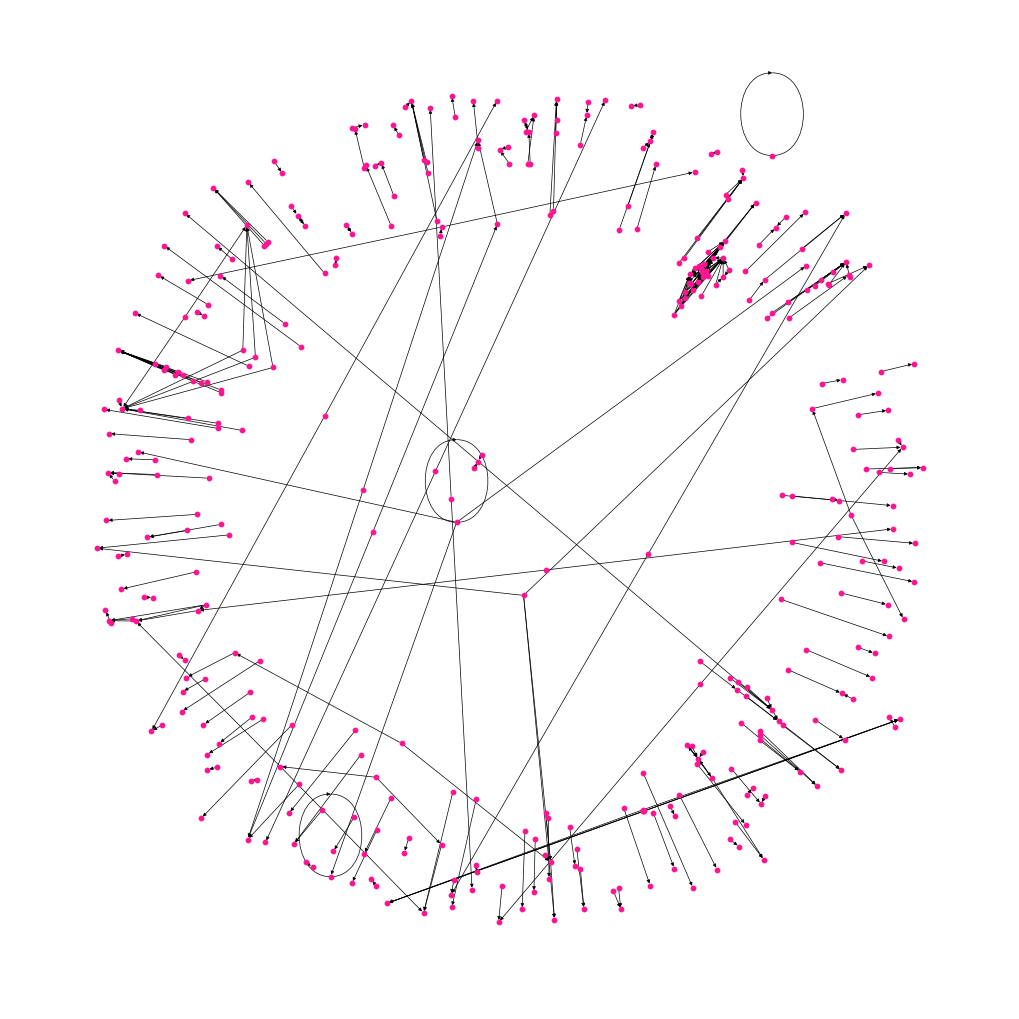

In [199]:
graph = nx.DiGraph()
graph.add_edges_from(edges)
plt.figure(figsize=(10,10))
nx.draw(graph,
        with_labels = False,
        node_color='deeppink',
        node_size=10,
        width=0.5,
        arrowsize=5,
        font_color="black",
        font_size=2)

In [8]:
EPO_IPCs_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Patent data/202001_EPO_IPC.txt',sep='|')
EPO_Patents_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Patent data/202001_EPO_Inventor_reg.txt',sep='|')
EPO_Citations_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Citation data/202001_EPO_CITATIONS.txt',sep='|')

In [9]:
PCT_IPCs_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Patent data/202001_PCT_IPC.txt',sep='|')
PCT_Patents_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Patent data/202001_PCT_Inv_reg.txt',sep='|')
PCT_Citations_raw = pd.read_csv('/Users/joebacchus/Desktop/Bartlett CASA/Data Original/Citation data/202001_PCT_CITATIONS.txt',sep='|')

#### Filtering

In [84]:
EPO_pat = EPO_Patents_raw.loc[EPO_Patents_raw['ctry_code'] == 'GB'][['app_nbr','reg_code','appln_id']].rename(columns={'app_nbr':'APP','appln_id':'ID','reg_code':'REG'}).drop_duplicates().astype(str)

In [85]:
EPO_cit = EPO_Citations_raw[['Citing_app_nbr','Citing_pub_date','Cited_App_nbr','Cited_pub_date']].rename(columns={'Citing_app_nbr':'APP CITING','Citing_pub_date':'DATE CITING','Cited_App_nbr':'APP CITED','Cited_pub_date':'DATE CITED'}).drop_duplicates().astype(str)

In [90]:
EPO_ipc = EPO_IPCs_raw[['appln_id','prio_year','IPC']].rename(columns={'appln_id':'ID','prio_year':'YEAR','IPC':'IPC'})

In [86]:
len(set(list(EPO_cit['APP CITING'])+list(EPO_cit['APP CITED'])).intersection(set(EPO_pat['APP'])))

194723

In [74]:
PCT_pat = PCT_Patents_raw.loc[PCT_Patents_raw['ctry_code'] == 'GB'][['pct_nbr','reg_code']].rename(columns={'pct_nbr':'APP','reg_code':'REG'}).drop_duplicates().astype(str)

In [75]:
PCT_cit = PCT_Citations_raw[['Citing_app_nbr','Citing_pub_date','Cited_App_nbr','Cited_pub_date']].rename(columns={'Citing_app_nbr':'APP CITING','Citing_pub_date':'DATE CITING','Cited_App_nbr':'APP CITED','Cited_pub_date':'DATE CITED'}).drop_duplicates().astype(str)

In [76]:
len(set(list(PCT_cit['APP CITING'])+list(PCT_cit['APP CITED'])).intersection(set(PCT_pat['APP'])))

75313

In [89]:
set(EPO_pat['ID']).intersection(set())

4                  2
206               85
582              266
1269             589
1276             590
             ...    
9182118    509041326
9182119    509041326
9182147    509176761
9182157    509176799
9182158    509176799
Name: ID, Length: 261844, dtype: object

In [83]:
EPO_Patents_raw

,app_nbr,appln_id,pub_nbr,person_id,inv_name,address,reg_code,ctry_code,reg_share,inv_share
0,EP20000103094,1,1037159,2,"Lipponen, Markku","Simo Kaarion katu 1 A 2,33720 Tampere",FI197,FI,1.0,0.250000
1,EP20000103094,1,1037159,3,"Laitinen, Timo","Peiponkatu 6,37830 Viiala",FI197,FI,1.0,0.250000
2,EP20000103094,1,1037159,4,"Aho, Ari","Elementinpolku 13 A 6,33720 Tampere",FI197,FI,1.0,0.250000
3,EP20000103094,1,1037159,5,"Knuutila, Jarno","Matti Tapion katu 1 F 17,33720 Tampere",FI197,FI,1.0,0.250000
4,EP20000107845,2,1024191,9,"Griffiths, Andrew David","28 Lilac Court, Cherry Hinton Road,Cambridge C...",UKH12,GB,1.0,0.166667
...,...,...,...,...,...,...,...,...,...,...
9182314,EP20190172049,511944146,3511460,69745810,"Brandl, Klaus","Wilhelmstr. 4,63512 Hainburg",DE71C,DE,1.0,0.500000
9182315,EP20190172049,511944146,3511460,69773942,"Schneider, Christian","Rasenheeg 3,36119 Neuhof",DE732,DE,1.0,0.500000
9182316,EP20190171783,512029478,3501658,69876717,"Chiu, Tzu-Keng","12F., No. 118, Touqian Rd., Xinzhuang Dist.,24...",TW000,TW,1.0,0.333333
9182317,EP20190171783,512029478,3501658,69903006,"Tseng, Huan-Yi","6F.-3, No. 7, Liyuan 1st St., Linkou Dist.,244...",TW000,TW,1.0,0.333333


In [317]:
Citations_raw

,source,target,time
0,EP19800103907,EP19790300134,1978
1,EP19800201077,EP19790300134,1978
2,EP19800201077,EP19790300251,1978
3,EP19790301557,EP19780300473,1979
4,EP19790300251,EP19780300203,1979
...,...,...,...
19762,EP20170794629,EP20090784654,2017
19763,EP20180752650,EP20090756784,2018
19764,EP20180746115,EP20080839560,2018
19765,EP20180752650,EP20130780381,2018


In [359]:
Citations_raw_2 = Citations_raw_2[['Citing_app_nbr','Cited_App_nbr']].rename(columns={'Citing_app_nbr':'source','Cited_App_nbr':'target'})

KeyError: "None of [Index(['Citing_app_nbr', 'Cited_App_nbr'], dtype='object')] are in the [columns]"

In [360]:
Patents_raw

,app_nbr,appln_id,reg_code,prio_year,IPC
0,EP20020258685,1303,UKJ42,2001,G02B021/00
2,EP20060250283,1972,UKH23,2005,G02B007/38
3,EP20060251704,1977,UKD71,2005,B62D053/08
4,EP20060794909,2112,UKF24,2005,H04Q001/14
5,EP20060808647,2151,UKD62,2005,H01J049/42
...,...,...,...,...,...
76156,EP20180020259,496110531,UKG24,2017,E02D029/14
76160,EP20180184062,497244282,UKM22,2017,B26D001/08
76161,EP20180191464,498998508,UKI12,2017,G10K011/178
76162,EP20180191464,498998508,UKH23,2017,G10K011/178


In [361]:
biotech_pd=pd.DataFrame()
for i in tqdm(range(len(biotech_classes))):
    filt_for_type = Patents_raw['IPC'].str.contains('^'+biotech_classes[i]).fillna(False)
    biotech_spec = Patents_raw.loc[filt_for_type]
    biotech_pd = pd.concat([biotech_pd, biotech_spec], ignore_index=True)

100%|█████████████████████████████████████████| 121/121 [00:03<00:00, 33.89it/s]


In [362]:
allowed = list(biotech_pd['app_nbr'].unique())
len(allowed)

1016

In [369]:
filtered_df = Citations_raw_2[Citations_raw_2["source"].isin(allowed) | Citations_raw_2["target"].isin(allowed)]

In [370]:
edges = list(zip(list(filtered_df['source']),list(filtered_df['target'])))

In [371]:
graph = nx.Graph()
graph.add_edges_from(edges)
len(graph.nodes())

1910

In [372]:
len(graph.nodes())

1910

In [373]:
Gcc = sorted(nx.connected_components(graph), key=len, reverse=True)
G0 = graph.subgraph(Gcc[0])
len(G0.nodes())

702

In [419]:
plt.figure(figsize=(20,20))
nx.draw(G0,
        with_labels = True,
        node_color='deeppink',
        node_size=10,
        width=0.5,
        arrowsize=5,
        font_color="black",
        font_size=5)

Error in callback <function flush_figures at 0x7ff1264c91f0> (for post_execute):


KeyboardInterrupt: 